<a href="https://colab.research.google.com/github/Bpriya2001/DeepLearning/blob/main/nn_Binary_Classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification in Neural Networks

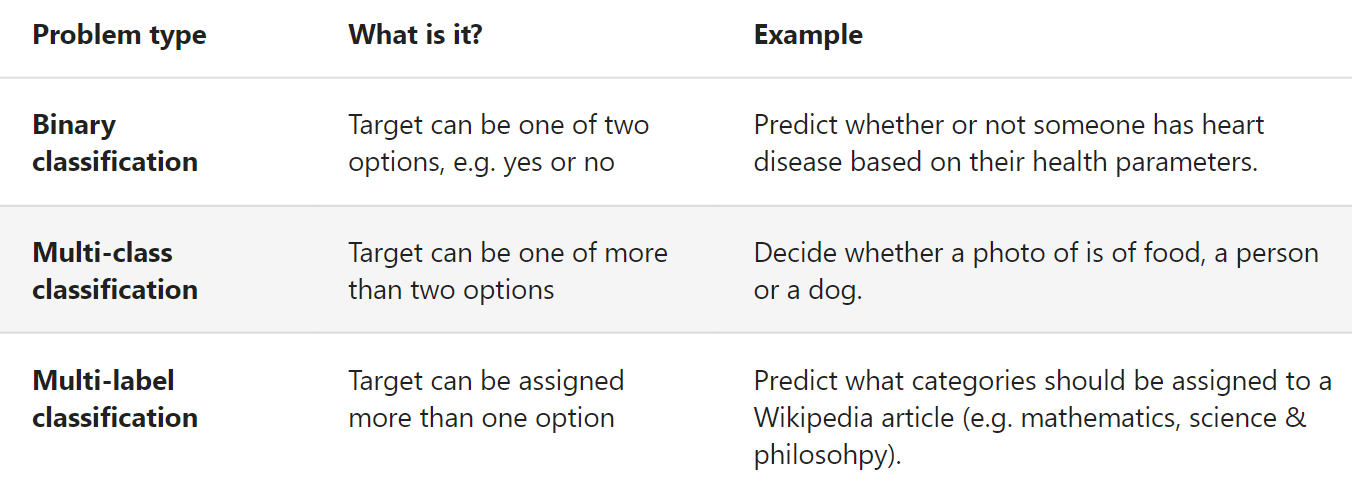

# Architecture of Classification Neural Networks

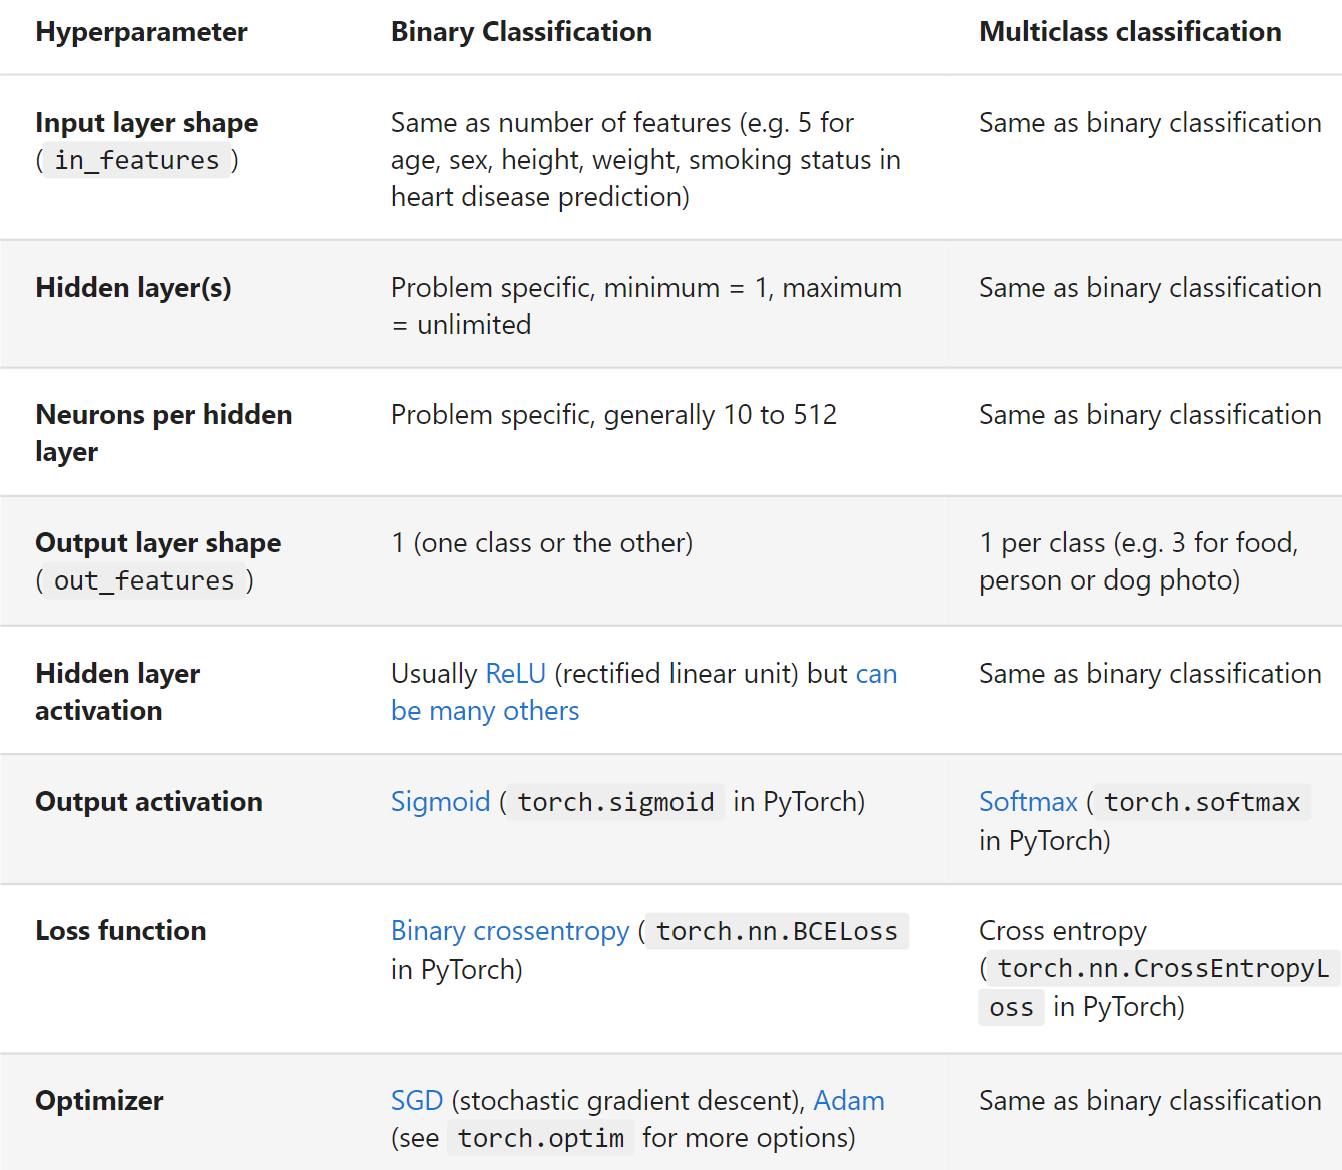

In [180]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Making data

In [181]:
from sklearn.datasets import make_moons

n_samples = 1000

# Creating moons

X, y = make_moons(n_samples, noise = 0.03, random_state = 42)

In [182]:
print(f"First 5 features:\n{X[:5]}")

print(f"First 5 labels:\n{y[:5]}")

First 5 features:
[[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]
First 5 labels:
[1 1 1 1 0]


In [183]:
X.shape

(1000, 2)

In [184]:
y.shape

(1000,)

## Visualising data

In [185]:
import pandas as pd

moons = pd.DataFrame({"X1": X[:,0],
                     "X2": X[:,1],
                     "label": y})

moons.head()

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [186]:
# Check labels and the number of data points in each

moons.label.value_counts()

,count
label,
1,500
0,500


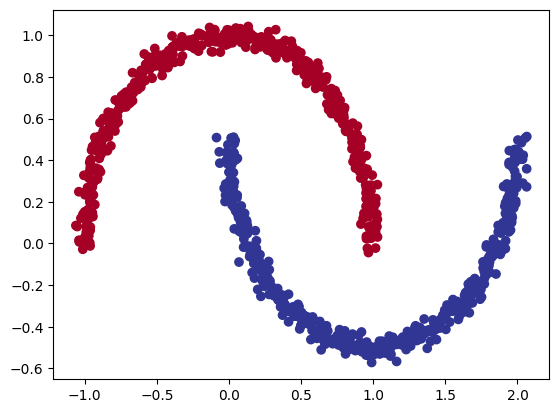

In [187]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:,0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu)

## Turn data into Tensors and Split into training and test data

In [188]:
import torch

X = torch.tensor(X, dtype = torch.float)
y = torch.tensor(y, dtype = torch.float)

X[:5], y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

# Building a Model

1. Set up device agnostic code
2. Use nn.Module to build a model
3. Define loss function and optimizer
4. Create training loop

In [190]:
from torch import nn

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [191]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2100, -0.4675],
                      [-0.3451,  0.2715],
                      [ 0.5622, -0.1933],
                      [-0.2903, -0.6394],
                      [-0.3646, -0.6192]])),
             ('0.bias', tensor([-0.1618,  0.1443, -0.6625,  0.6174,  0.4436])),
             ('1.weight',
              tensor([[-0.4378, -0.2136,  0.1459, -0.0919, -0.0487]])),
             ('1.bias', tensor([-0.2019]))])

# Loss and Optimizer

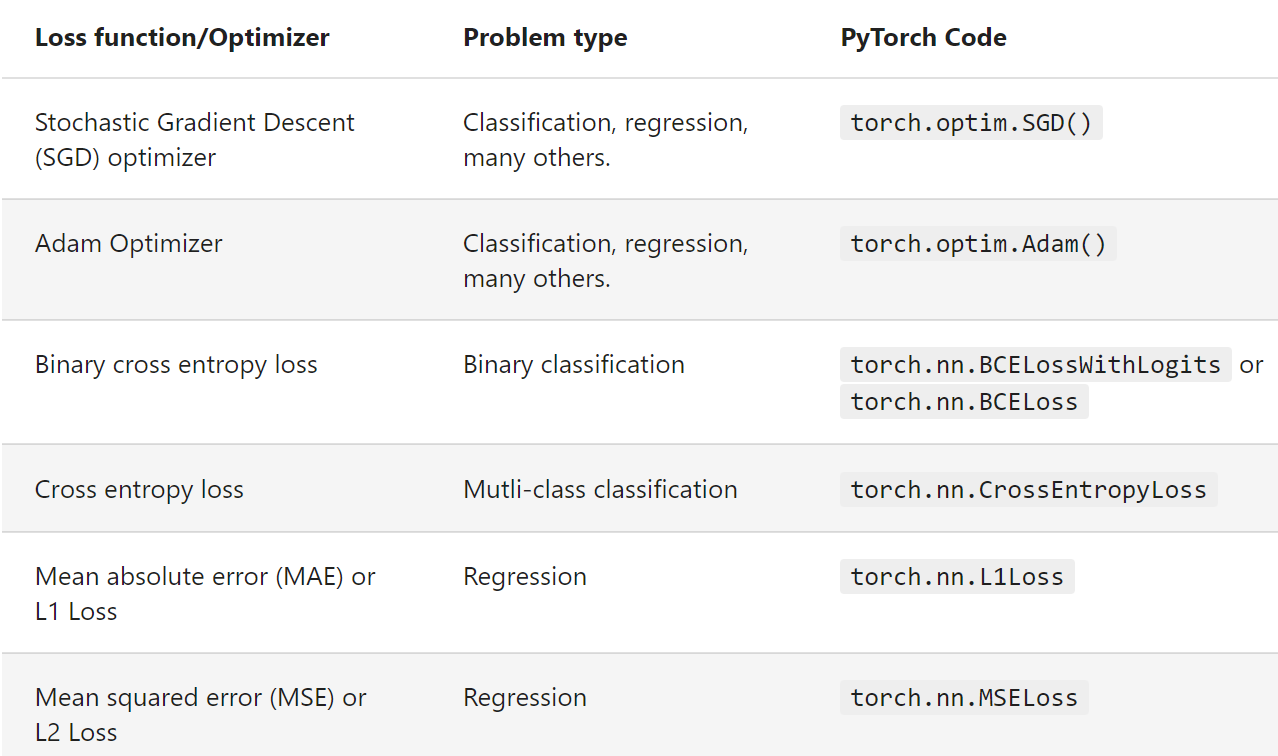

PyTorch has two binary cross entropy implementations:

1. torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in.

Documentation for torch.nn.BCEWithLogitsLoss() states that it's more numerically stable than using torch.nn.BCELoss() after a nn.Sigmoid layer.


In [192]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

# Train Model

1. Do the forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backwards (Backpropagation)
5. Optimizer step step step


Raw outputs of the model are called **logits**.

In [193]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

We need to convert the logits to a useful outcome.

Logits -> prediction probabilities -> prediction labels

* We can covert **logits** to **prediction probabilities** by passing it through an activation function. This can be **sigmoid** (for binary classification) or **softmax** (multiclass classification)

* We can convert **prediction probabilities** to **prediction labels** by **rounding** (binary) or by using **argmax**() (multi class)

In [194]:
model_0.eval()

with torch.inference_mode():

  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.3594],
        [-0.1128],
        [-0.2980],
        [-0.0950],
        [-0.1458]])

In [195]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

This is not the same format as test data

In [196]:
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4111],
        [0.4718],
        [0.4261],
        [0.4763],
        [0.4636]])

In [197]:
y_preds = torch.round(y_pred_prob)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [198]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


In [199]:
y_preds.squeeze()

tensor([0., 0., 0., 0., 0.])

In [200]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# Building Training and Testing Loop

In [201]:
def accuracy_function(y_preds, y_test):

  print(y_preds.shape)
  print(y_test.shape)

  correct = torch.eq(y_preds, y_test).sum().item()
  acc = (correct / len(y_preds)) * 100
  return acc

In [202]:
torch.manual_seed(42)

epochs = 100

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_function(y_preds, y_test)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():

    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_logits = loss_fn(test_logits, y_test)
    test_acc = accuracy_function(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_logits:.5f} | Test Acc: {test_acc:.2f}%")




torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
Epoch: 0 | Loss: 0.71330 | Acc: 10000.00% | Test Loss: 0.70770 | Test Acc: 50.50%
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([5, 1])
torch.Size([200])
torch.Size([200])
torch.Size([200])
Epoch: 10 | Loss: 0.62479 | Acc: 10000.00% | Test Loss: 0.62669 | Test Acc: 75.00%
torch.Size([5, 1])
torch.Size([2

# Making predictions

In [203]:
import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [204]:
def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test,
                    test_labels = y_test, predictions = None):

  plt.figure(figsize=(10, 5))

  plt.scatter(train_data, train_labels, c='b', label='Training data')
  plt.scatter(test_data, test_labels, c='g', label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', label='Predictions')

  plt.legend()
  plt.xlabel('Data')
  plt.ylabel('Target')
  plt.title('Training and Testing Data')
  plt.show()

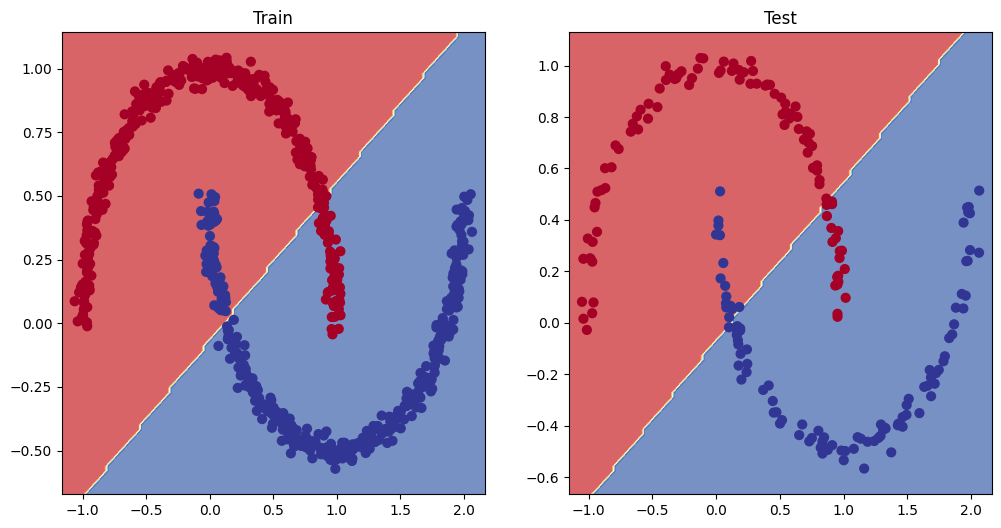

In [205]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# Improving Models

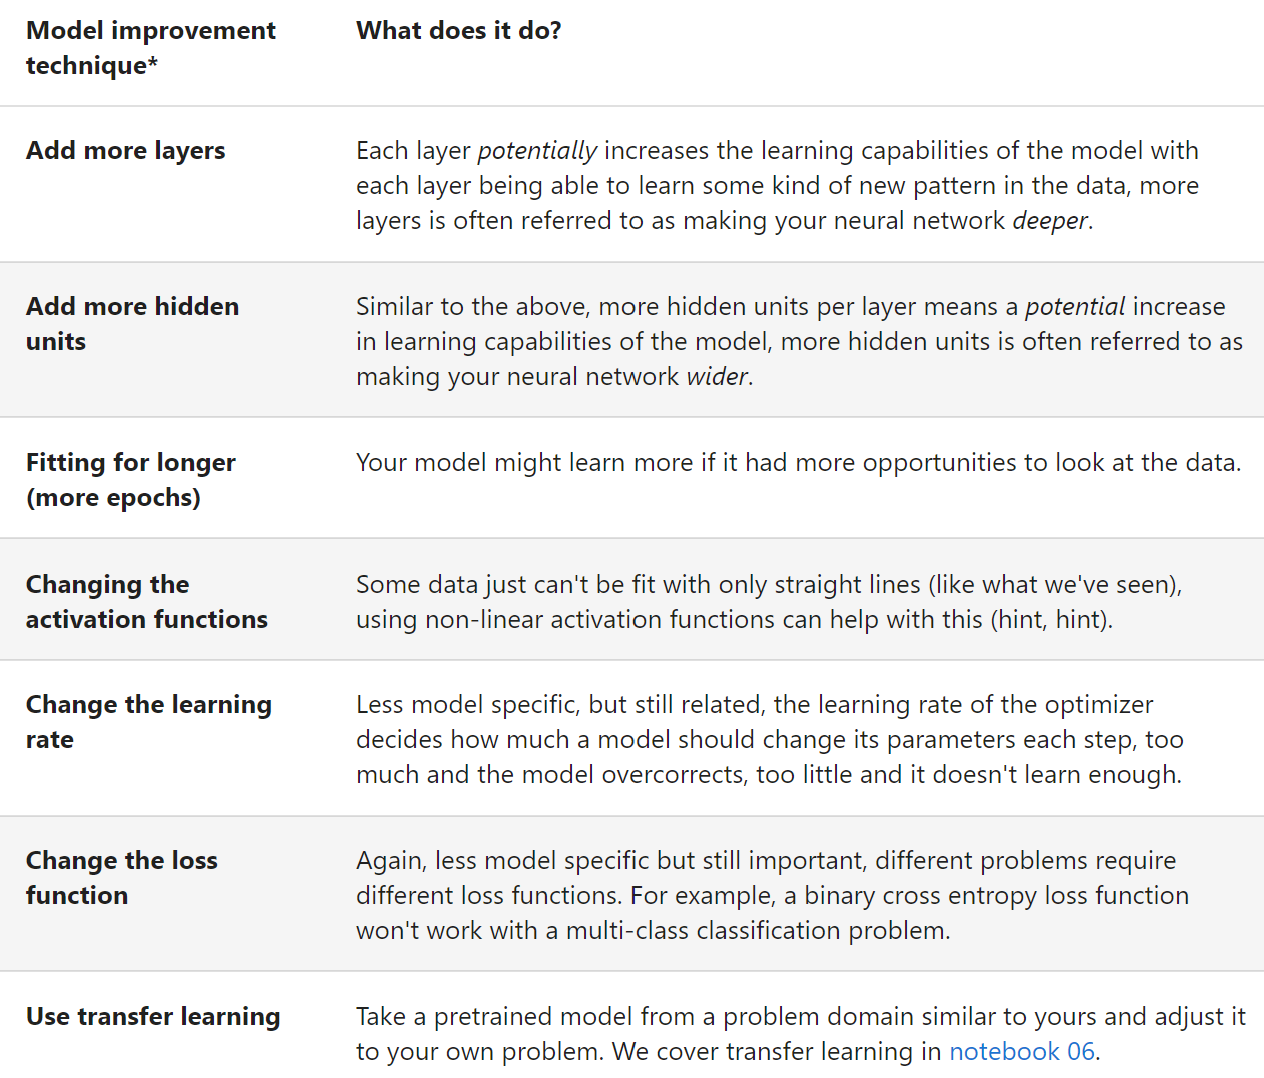

In [206]:
## non linear model

class MoonModelV1(nn.Module):

  def __init__(self, input_features, hidden_units, output_features, num_hidden_layers):

    super().__init__()

    self.num_hidden_layers = num_hidden_layers

    # Input Layer
    self.layer_0 = nn.Linear(in_features= input_features,
                            out_features= hidden_units)

    self.hidden_layers = nn.ModuleList([
            nn.Linear(in_features=hidden_units, out_features=hidden_units)
            for _ in range(num_hidden_layers)
        ])

    # Output Layer
    self.layer_n = nn.Linear(in_features= hidden_units,
                            out_features= output_features)

    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.layer_0(x)
    x = self.relu(x)

    for layer in self.hidden_layers:
      x = layer(x)
      x = self.relu(x)

    x = self.layer_n(x)

    return x


In [207]:
torch.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

def training_testing_loop(model, loss_fn, optimizer, epochs):

  for epoch in range(epochs):

    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_function(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():

      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_function(test_pred, y_test)

    if epoch % 500 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
Epoch: 0 | Loss: 0.71297 | Acc: 50.00% | Test Loss: 0.70942 | Test Acc: 50.00%
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
tor

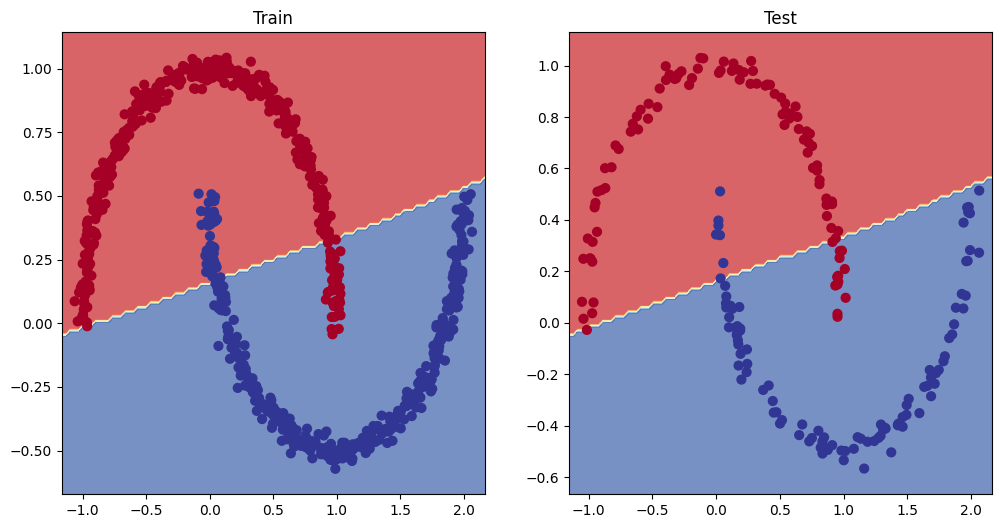

In [208]:
model_1 = MoonModelV1(input_features = 2, hidden_units = 5, output_features = 1, num_hidden_layers = 2)

model_1.to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

training_testing_loop(model = model_1,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 1000)

# plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
Epoch: 0 | Loss: 0.70475 | Acc: 50.00% | Test Loss: 0.70410 | Test Acc: 50.00%
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
tor

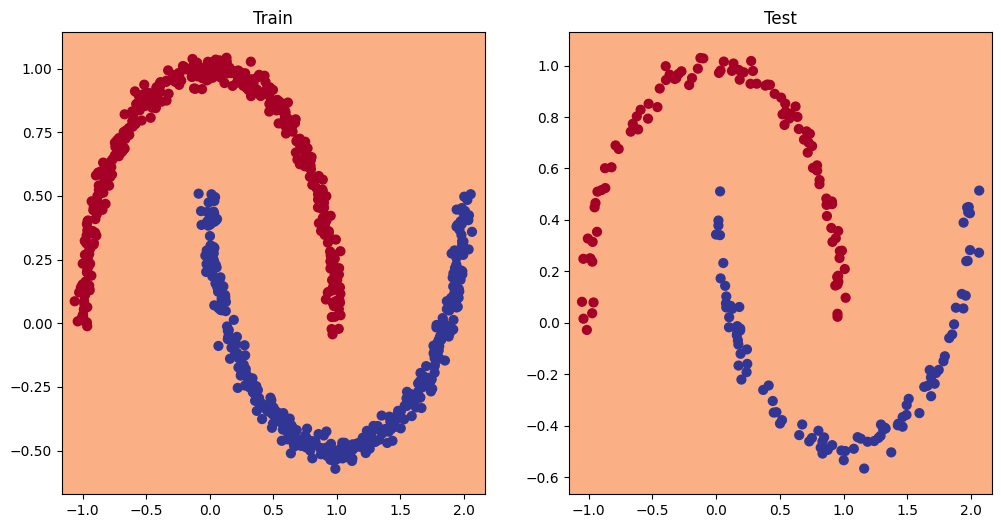

In [209]:
model_2 = MoonModelV1(input_features = 2, hidden_units = 5, output_features = 1, num_hidden_layers = 5)

model_2.to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

training_testing_loop(model = model_2,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 1000)

# plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
plt.show()

torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
Epoch: 0 | Loss: 0.69897 | Acc: 50.00% | Test Loss: 0.69829 | Test Acc: 50.00%
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
tor

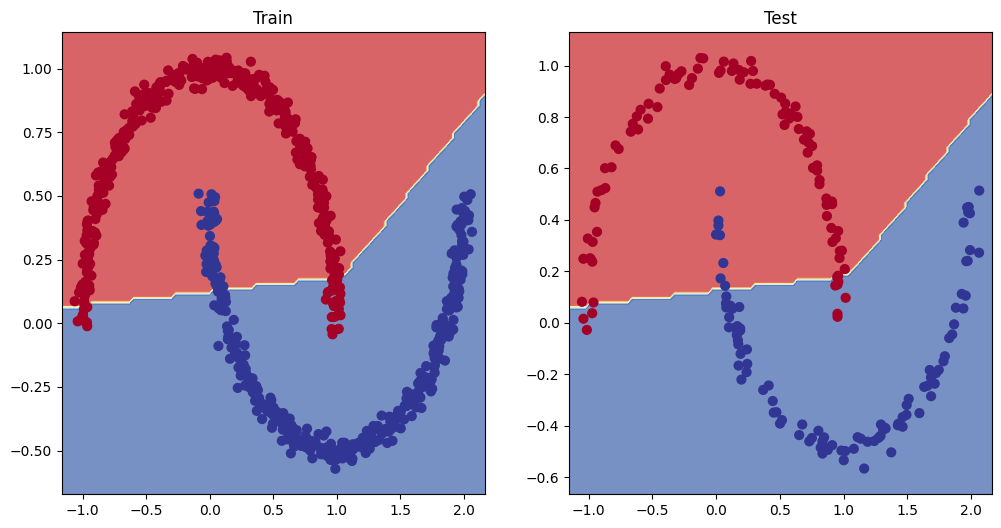

In [210]:
model_3 = MoonModelV1(input_features = 2, hidden_units = 7, output_features = 1, num_hidden_layers = 1)

model_3.to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

training_testing_loop(model = model_3,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 1000)

# plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)
plt.show()

torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
Epoch: 0 | Loss: 0.70021 | Acc: 50.00% | Test Loss: 0.69935 | Test Acc: 50.00%
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
tor

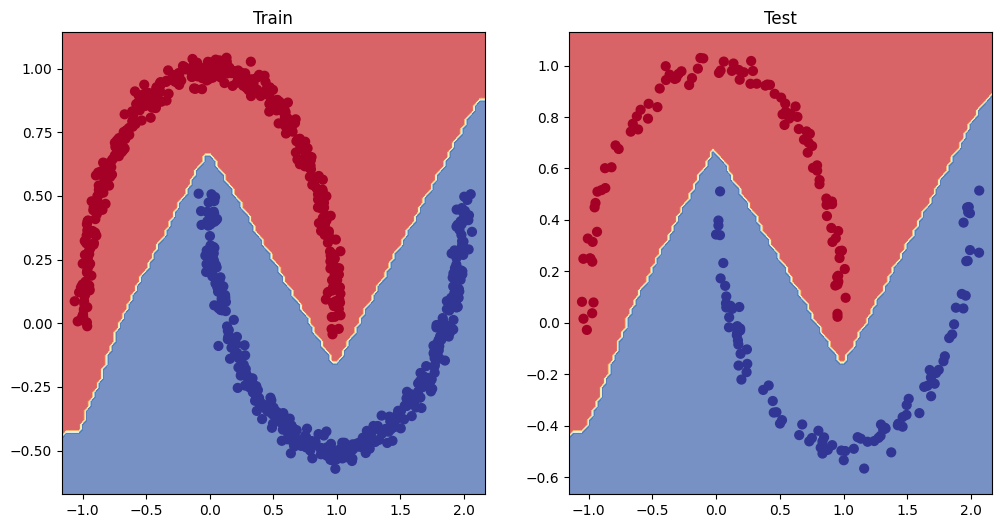

In [211]:
model_4 = MoonModelV1(input_features = 2, hidden_units = 7, output_features = 1, num_hidden_layers = 2)

model_4.to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

training_testing_loop(model = model_4,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 1000)

# plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)
plt.show()

torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
Epoch: 0 | Loss: 0.70464 | Acc: 50.00% | Test Loss: 0.70261 | Test Acc: 50.00%
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
torch.Size([200])
torch.Size([800])
torch.Size([800])
torch.Size([200])
tor

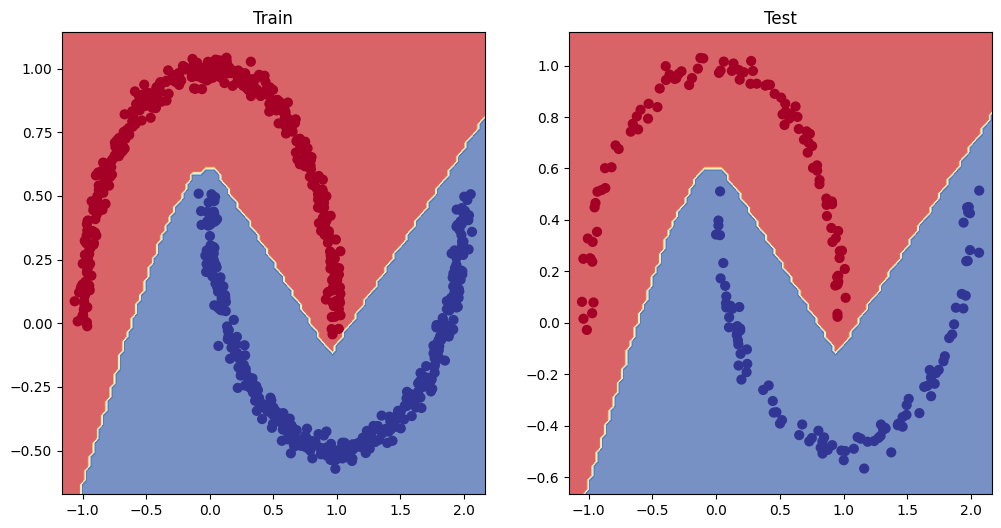

In [212]:
model_5 = MoonModelV1(input_features = 2, hidden_units = 10, output_features = 1, num_hidden_layers = 1)

model_5.to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_5.parameters(), lr = 0.1)

training_testing_loop(model = model_5,
                      loss_fn = loss_fn,
                      optimizer = optimizer,
                      epochs = 1000)

# plot decision boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)
plt.show()